# **Task 1 - Implement a Simple RNN to Predict the Next Value in a Small Sequence of Numbers**

***Read the following descriptions and instructions***

In time-series analysis, predicting future values based on past observations is a fundamental task. Recurrent Neural Networks (RNNs) are particularly well-suited for this type of problem due to their ability to maintain a memory of previous inputs through their recurrent connections.

In this task, you will work with a synthetic dataset that represents a simple sine wave. The sine wave is a periodic function and serves as a good example to understand how RNNs can capture patterns and make predictions.

A **sine wave** is a fundamental waveform that is widely used in various fields, including signal processing, physics, and time-series analysis. It is characterized by its smooth, periodic oscillations, making it an ideal example for understanding time-series prediction tasks.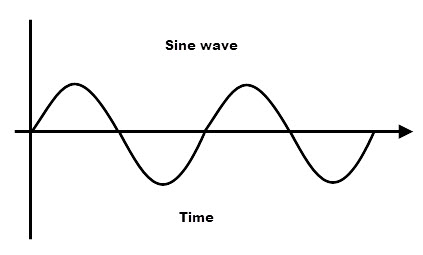

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

2024-09-02 11:03:33.516561: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-02 11:03:33.531935: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-02 11:03:33.536284: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-02 11:03:33.548267: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-02 11:03:34.822472: W tensorflow/compiler/tf2

The generate_sine_wave function generates a synthetic sine wave dataset, which is often used in time-series prediction tasks, particularly for training models like RNNs and LSTMs.


**seq_length=100**: This parameter is intended to specify the length of the sequence that you want to generate

**num_samples=1000**:This parameter determines the number of data points (samples) to generate for the sine wave.

In [2]:
# 1. Generate a Synthetic Sine Wave Dataset
def generate_sine_wave(seq_length=100, num_samples=1000):
    x = np.linspace(0, 50, num_samples)
    y = np.sin(x)
    return y


The create_dataset function prepares the sine wave data for use in an RNN by converting the continuous data into sequences that the RNN can learn from. The time_step parameter in the create_dataset function represents the number of previous time points (or observations) that are used as input to predict the next time point in a sequence.

In [3]:
# 2. Prepare the Dataset for RNN
def create_dataset(data, time_step=10):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step)])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

To prepare the data for modeling, it is important to normalize it so that all values fall within a specific range, typically between 0 and 1. This step improves the performance and convergence of neural network models.

The MinMaxScaler from sklearn.preprocessing is used for this purpose. It scales the data such that the minimum value of the data becomes 0 and the maximum value becomes 1.

The sine wave data is reshaped into a 2D array (-1, 1) to fit the scaler, as it expects a 2D input. After scaling, the data is reshaped back into its original 1D form.


In [4]:
# Generate and Normalize the Data
data = generate_sine_wave()
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.reshape(-1, 1)).reshape(-1)

In [5]:
# Create the Dataset
time_step = 10  # Time steps for RNN input
X, y = create_dataset(data, time_step)

In [6]:
# Reshape for RNN input [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)


This division of data helps in evaluating the model’s performance by training it on a substantial portion of the data and testing its predictions on unseen data.

In [7]:
# Split the Data into Training and Testing Sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


***Modify the units parameter in the SimpleRNN layer to see how the number of hidden units affects the model's ability to learn the sequence.***


**optimizer='adam':** Uses the Adam optimizer, which is a popular choice for training deep learning models due to its adaptive learning rate.


**loss='mean_squared_error':** Sets the loss function to mean squared error (MSE), which is commonly used for regression tasks to measure the average squared difference between predicted and actual values.

In [8]:
# 3. Define the RNN Model
model = Sequential()
model.add(SimpleRNN(units=15, return_sequences=False, input_shape=(time_step, 1)))  # <-- Tune 'units'
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

I0000 00:00:1725255217.158695   36676 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1725255217.187899   36676 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1725255217.187953   36676 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1725255217.190388   36676 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1725255217.190569   36676 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

***Adjust the epochs and batch_size during the training phase to optimize the model's learning process and performance.***

an

**epochs=20:** Specifies the number of times the entire training dataset will pass through the model.


**batch_size=32:** Determines the number of samples per gradient update.

**verbose=1:** Provides detailed output during training, including the progress of each epoch and loss values.

In [9]:
# 4. Train the Model
model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=1)  # <-- Experiment with 'epochs' and 'batch_size'

Epoch 1/30


I0000 00:00:1725255219.989698   36926 service.cc:146] XLA service 0x7f8d48007830 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725255219.989783   36926 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 Ti, Compute Capability 7.5
2024-09-02 11:03:40.033313: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-02 11:03:40.231606: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


19/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2408

I0000 00:00:1725255221.131652   36926 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.2052
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0169
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0054
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.8940e-04
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.4226e-04
Epoch 9/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.1215e-04
Epoch 10/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.3895e-04
Epoch 11/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.0829e-04
Epoch 12/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.7299e-04
Epoch 13/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.3819e-04
Epoch 14/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.6687e-04
Epoch 15/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.35

In [10]:
# 5. Predict on the Test Data
y_pred = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step


These steps reverse the normalization applied earlier to the predictions and actual values. Normalization scales the data to a range, typically [0, 1], which helps with model training but makes the results difficult to interpret directly.
By applying the inverse transformation, you convert the scaled predictions (y_pred) and test values (y_test) back to their original scale, allowing you to evaluate and visualize the model's performance in the context of the original data values.

In [11]:
# Inverse transform to get the original scale (if normalization was applied)
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).reshape(-1)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(-1)

This plot visually compares the actual sine wave values (y_test) with the values predicted by the RNN model (y_pred).

By plotting both sets of values on the same graph, you can easily see how well the model's predictions align with the actual data.

This visualization helps in assessing the performance of the RNN model and understanding how accurately it captures the underlying pattern in the time series data.

***Analyze the resulting plot. If the predicted values deviate significantly from the actual values, experiment with different model configurations and training parameters to improve accuracy.***
  
# **Describe your observations. You can add a text cell and type your observations.**

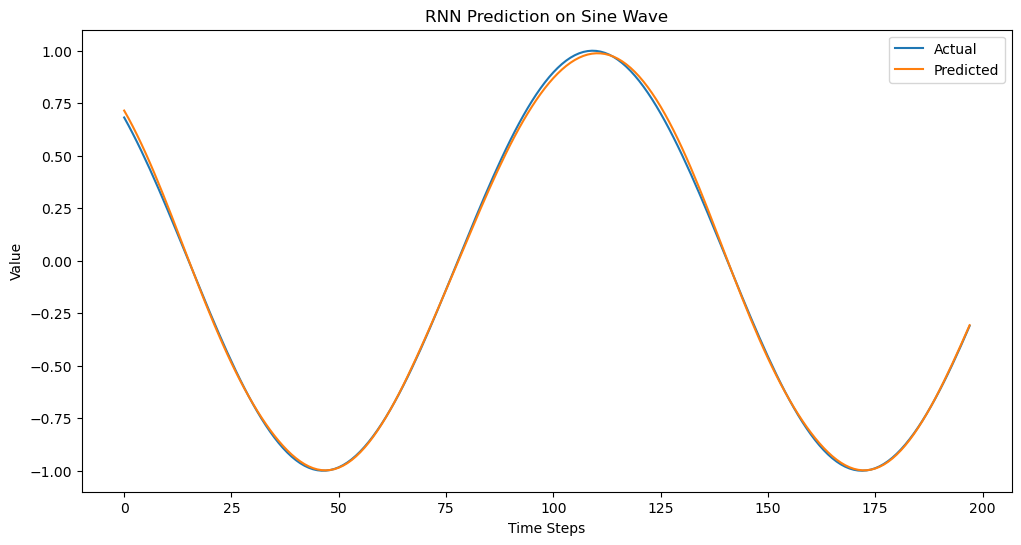

In [12]:

# 6. Plot the Results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.title('RNN Prediction on Sine Wave')
plt.legend()
plt.show()

### Observations
* The model performs reasonably well, capturing the general sine wave pattern. There's some slight deviation, especially at the peaks and troughs.

# Modified Model - 1

- Reduced the number of unit to 8

Epoch 1/30


/home/shavinda/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.6117
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2200
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1111
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0727
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0435
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0256
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0199
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0178
Epoch 9/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0146
Epoch 10/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0123
Epoch 11/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0096
Epoch 12/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0078
Epoch 13/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0059
Epoch 14/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0048
Epoch 15/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0038
Epoch 16/30
25/2

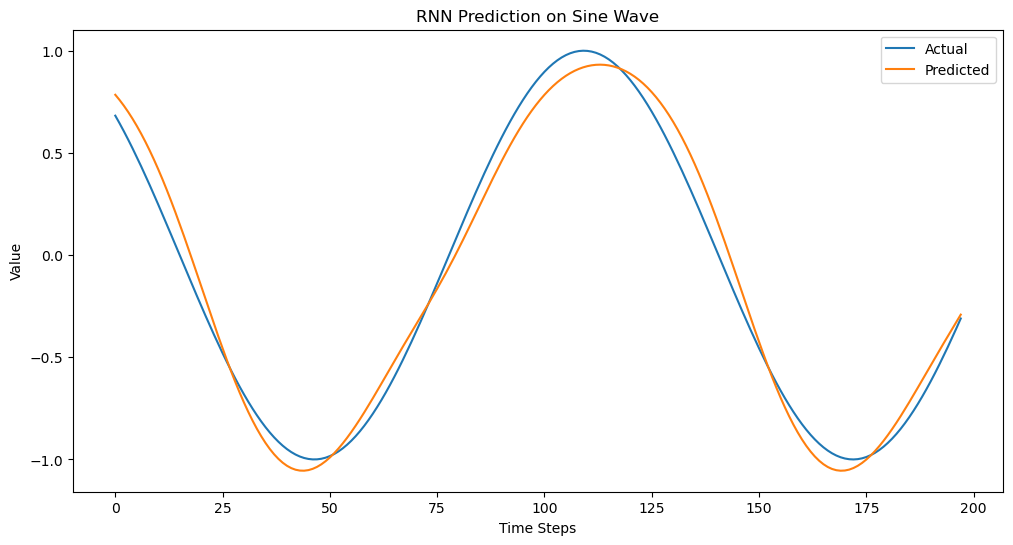

In [13]:
# Generate a Synthetic Sine Wave Dataset
def generate_sine_wave(seq_length=100, num_samples=1000):
    x = np.linspace(0, 50, num_samples)
    y = np.sin(x)
    return y

# Prepare the Dataset for RNN
def create_dataset(data, time_step=10):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step)])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

# Reshape for RNN input [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the Data into Training and Testing Sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Generate and Normalize the Data
data = generate_sine_wave()
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.reshape(-1, 1)).reshape(-1)

# Create the Dataset
time_step = 10  # Time steps for RNN input
X, y = create_dataset(data, time_step)

# Define the RNN Model
model = Sequential()
model.add(SimpleRNN(units=8, return_sequences=False, input_shape=(time_step, 1)))  # <-- Tune 'units'
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the Model
model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=1)  # <-- Experiment with 'epochs' and 'batch_size'

# Predict on the Test Data
y_pred = model.predict(X_test)

# Inverse transform to get the original scale (if normalization was applied)
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).reshape(-1)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(-1)


# Plot the Results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.title('RNN Prediction on Sine Wave')
plt.legend()
plt.show()

### Observations 
* The model's performance slightly decreases. It still captures the overall pattern, but there's more deviation from the actual values, especially at the extremes.

# Modified Model - 2

* Increased the number of unit to 25

Epoch 1/30


/home/shavinda/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3376
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0268
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0055
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0024
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0010 
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.4910e-04
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.0086e-04
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.3857e-04
Epoch 9/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.8413e-04
Epoch 10/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.1100e-04
Epoch 11/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.6512e-04
Epoch 12/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.4718e-04
Epoch 13/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.0031e-04
Epoch 14/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.9218e-04
Epoch 15/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

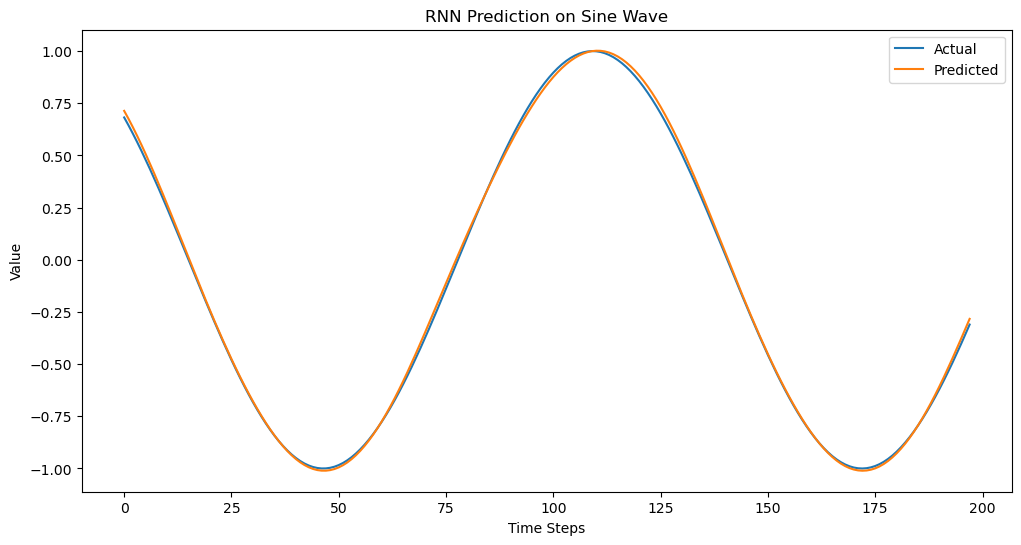

In [14]:
# Generate a Synthetic Sine Wave Dataset
def generate_sine_wave(seq_length=100, num_samples=1000):
    x = np.linspace(0, 50, num_samples)
    y = np.sin(x)
    return y

# Prepare the Dataset for RNN
def create_dataset(data, time_step=10):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step)])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

# Reshape for RNN input [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the Data into Training and Testing Sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Generate and Normalize the Data
data = generate_sine_wave()
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.reshape(-1, 1)).reshape(-1)

# Create the Dataset
time_step = 10  # Time steps for RNN input
X, y = create_dataset(data, time_step)

# Define the RNN Model
model = Sequential()
model.add(SimpleRNN(units=25, return_sequences=False, input_shape=(time_step, 1)))  # <-- Tune 'units'
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the Model
model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=1)  # <-- Experiment with 'epochs' and 'batch_size'

# Predict on the Test Data
y_pred = model.predict(X_test)

# Inverse transform to get the original scale (if normalization was applied)
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).reshape(-1)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(-1)


# Plot the Results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.title('RNN Prediction on Sine Wave')
plt.legend()
plt.show()

### Observations 
* The model's performance improves. The predicted values align more closely with the actual values, with less deviation at the peaks and troughs.

# Modified Model - 3

* Decreased the number of epochs to 30

Epoch 1/30


/home/shavinda/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0605
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0146
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0034
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0014
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.3344e-04
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.3169e-04
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.2518e-04
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.7654e-04
Epoch 9/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.5243e-04
Epoch 10/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.2777e-04
Epoch 11/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.0241e-04
Epoch 12/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.9543e-04
Epoch 13/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.7420e-04
Epoch 14/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.4908e-04
Epoch 15/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 

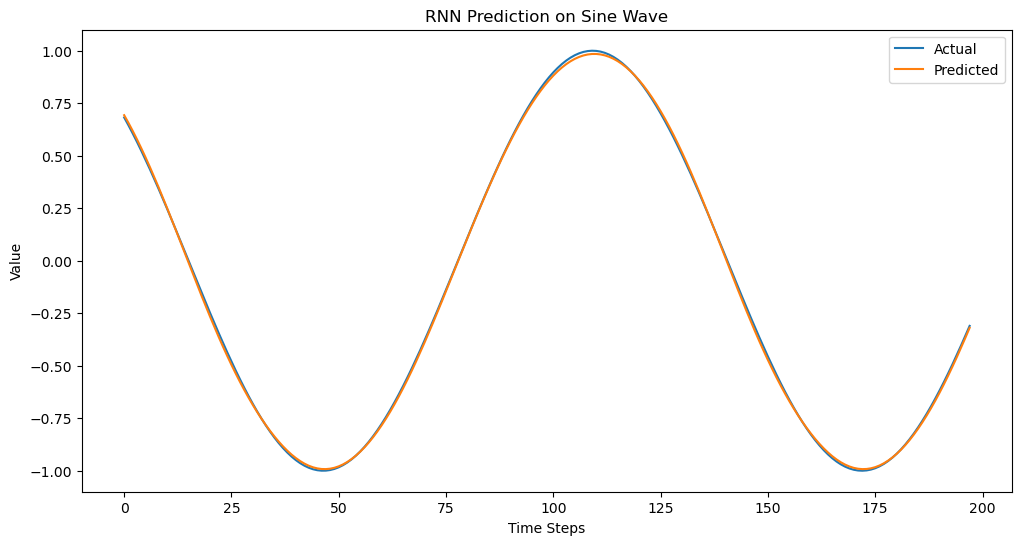

In [15]:
# Generate a Synthetic Sine Wave Dataset
def generate_sine_wave(seq_length=100, num_samples=1000):
    x = np.linspace(0, 50, num_samples)
    y = np.sin(x)
    return y

# Prepare the Dataset for RNN
def create_dataset(data, time_step=10):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step)])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

# Reshape for RNN input [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the Data into Training and Testing Sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Generate and Normalize the Data
data = generate_sine_wave()
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.reshape(-1, 1)).reshape(-1)

# Create the Dataset
time_step = 10  # Time steps for RNN input
X, y = create_dataset(data, time_step)

# Define the RNN Model
model = Sequential()
model.add(SimpleRNN(units=15, return_sequences=False, input_shape=(time_step, 1)))  # <-- Tune 'units'
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the Model
model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=1)  # <-- Experiment with 'epochs' and 'batch_size'

# Predict on the Test Data
y_pred = model.predict(X_test)

# Inverse transform to get the original scale (if normalization was applied)
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).reshape(-1)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(-1)


# Plot the Results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.title('RNN Prediction on Sine Wave')
plt.legend()
plt.show()

### Observations
* The model's performance slightly decreases. It still captures the overall pattern, but there's more deviation from the actual values compared to the base model.

# Modified Model - 4

* Increased the number of epochs to 60

Epoch 1/60


/home/shavinda/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - loss: 0.0458
Epoch 2/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0139
Epoch 3/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0099
Epoch 4/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0067
Epoch 5/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0044
Epoch 6/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0026
Epoch 7/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0014
Epoch 8/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8.4292e-04
Epoch 9/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.8915e-04 
Epoch 10/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.1475e-04
Epoch 11/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.8854e-04
Epoch 12/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.8576e-04
Epoch 13/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.3089e-04
Epoch 14/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.0718e-04 
Epoch 15/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.

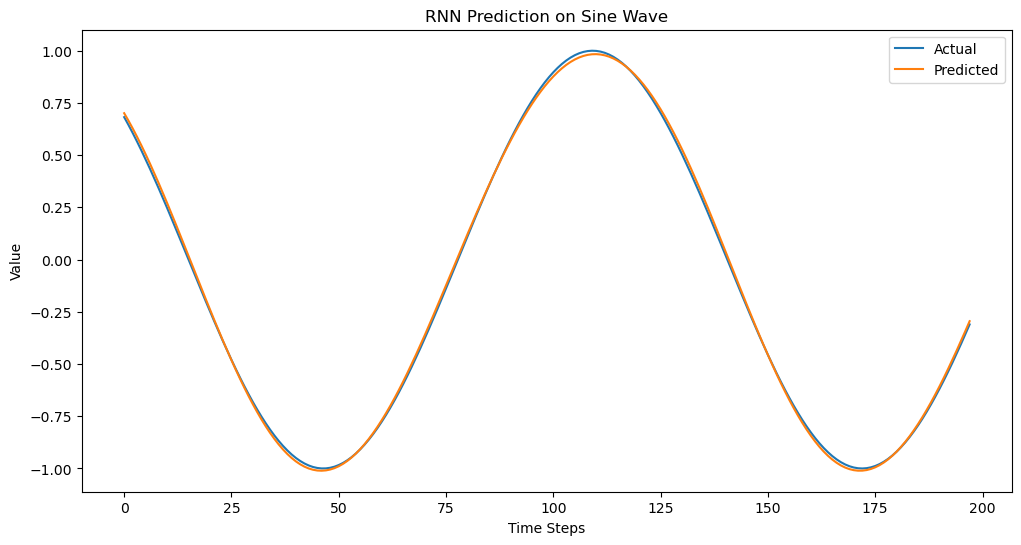

In [16]:
# Generate a Synthetic Sine Wave Dataset
def generate_sine_wave(seq_length=100, num_samples=1000):
    x = np.linspace(0, 50, num_samples)
    y = np.sin(x)
    return y

# Prepare the Dataset for RNN
def create_dataset(data, time_step=10):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step)])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

# Reshape for RNN input [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the Data into Training and Testing Sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Generate and Normalize the Data
data = generate_sine_wave()
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.reshape(-1, 1)).reshape(-1)

# Create the Dataset
time_step = 10  # Time steps for RNN input
X, y = create_dataset(data, time_step)

# Define the RNN Model
model = Sequential()
model.add(SimpleRNN(units=20, return_sequences=False, input_shape=(time_step, 1)))  # <-- Tune 'units'
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the Model
model.fit(X_train, y_train, epochs=60, batch_size=64, verbose=1)  # <-- Experiment with 'epochs' and 'batch_size'

# Predict on the Test Data
y_pred = model.predict(X_test)

# Inverse transform to get the original scale (if normalization was applied)
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).reshape(-1)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(-1)


# Plot the Results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.title('RNN Prediction on Sine Wave')
plt.legend()
plt.show()

### Observations 
* The model's performance improves significantly. The predicted values align very closely with the actual values, with minimal deviation throughout the sequence.